# Τελική Εργασία -Ανάλυση και επεξεργασία σήματος

### Εισαγωγή απαραίτητων βιβλιοθηκών

In [329]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams["figure.figsize"] = (20,15)

### Η διαδικασία Ornstein–Uhlenbeck
ορίζεται από την παρακάτω στοχαστική διαφορική εξίσωση:

- dxt/dt = -axtdt + σ*Wdt


### Αρχικοποίηση του t και εισαγωγή 10000 τυχαίων τιμών τιμών από -1 έως 1 και τοποθέτηση τιμών μπροστά από το w


In [330]:
t1 = np.zeros(10000) 
t2 = np.zeros(10000) 
b1 = np.zeros(10000) 
b2 = np.zeros(10000) 
a1 = np.zeros(10000)
a2 = np.zeros(10000)
a = 0.8
s1 = 30
s2 = 120


In [331]:
for i in range(10000):
    t1[i] = 1
    t1[i] = 1
    b1[i] = 1
    b2[i] = 1
    a1[i] = 1
    a2[i] = 1
    

### Αρχικοποίηση του w1,w2,a και εισαγωγή 10000 τυχαίων τιμών τιμών από -1 έως 1  

In [332]:
w1 = np.zeros(10000)
w2 = np.zeros(10000)
g1 = np.zeros(10000)
g2 = np.zeros(10000)
for i in range(10000):
    w1[i] = round(random.uniform(-1.00,1.00),1)
    w2[i] = round(random.uniform(-1.00,1.00),1)
    g1[i] = round(random.uniform(-1.00,1.00),1)
    g2[i] = round(random.uniform(-1.00,1.00),1)


### Αποθήκευση των τιμών w1,w2 και a σε ένα αρχείο .csv

In [333]:
with open('OData.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['w1', 'w2', 'a'])
    for i in range(10000):
        writer.writerow([w1[i], w2[i]])

### Τοποθετώ την μεταβλητή για τον υπολογισμό του Moving Average

In [334]:
window_size = 30

### Εφαρμογή της εξίσωσης για τις w τιμές και με τιμή t και σ = 30

- α = β*γ

### όπου το β είναι η Ornstein–Uhlenbeck και το γ είναι ο περαιτέρω θόρυβος παίρνει τυχαίες τιμές

In [335]:
for i in range(1,10000):
    if i != 0 :
        t1[i] = (-a * t1[i-1] + s1 * w1[i])
        b1[i] = t1[i]
        a1[i] = (b1[i] * g1[i]) +150
        a1[i] = np.log(a1[i])
        
nan_indices = np.isnan(a1)
a1[nan_indices] = 0       

### Δημιουργία νέα χρονοσειράς με το Moving Average για σ = 30 και από-λογαριθμίζουμε το smoothed_a1

In [336]:
smoothed_a1 = np.convolve(a1, np.ones(window_size) / window_size, mode='valid')
smoothed_a1 = np.exp(smoothed_a1)

### Σχεδιάγραμμα των αποτελεσμάτων της εξίσωσης για σ = 30 και την αντίστοιχo Average τους

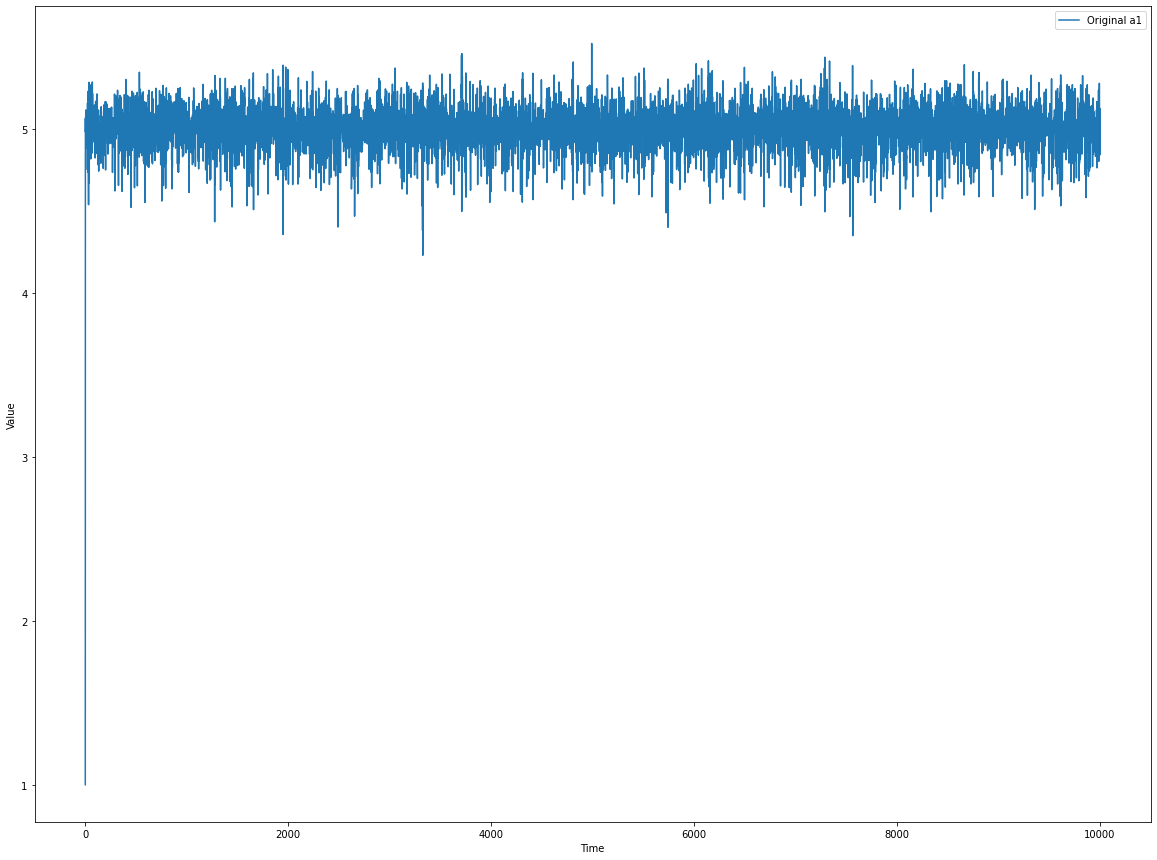

In [337]:
plt.plot(a1, label='Original a1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('a1.pdf', format='pdf')
plt.show()

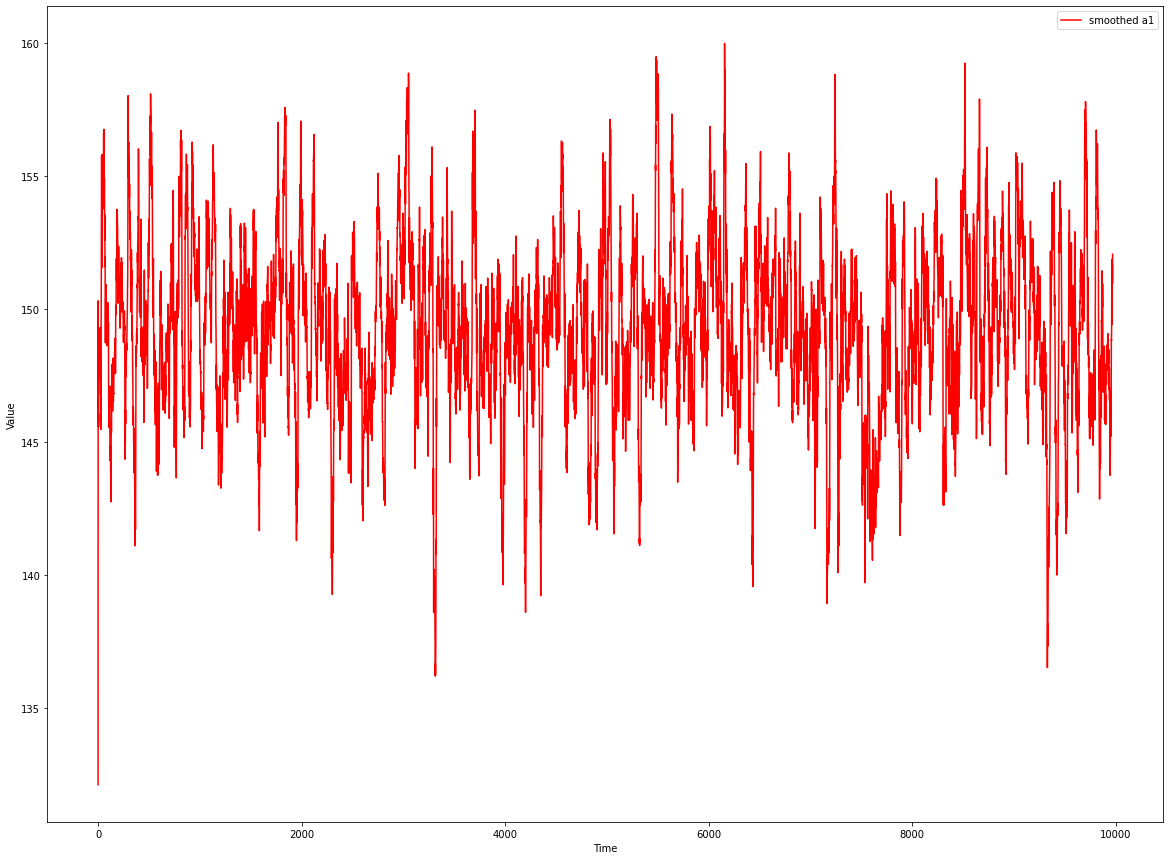

In [338]:
plt.plot(smoothed_a1, label='smoothed a1',color = 'red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('smoothed_a1.pdf', format='pdf')
plt.show()

### Υπολογισμός της Διαφοράς των χρονοσειρών για σ = 30

In [339]:
diff1 = [a1[i] - a1[i-1] for i in range(1,len(a1))]


### Εφαρμογή της εξίσωσης για τις w τιμές και με τιμή t και σ = 30

- α = β*γ

### όπου το β είναι η Ornstein–Uhlenbeck και το γ είναι ο περαιτέρω θόρυβος παίρνει τυχαίες τιμές και λογαριθμίζουμε το αποτέλεσμα α

In [340]:
for i in range(1,10000):
    if i != 0 :
        t2[i] = -a*t2[i-1] + s2*w2[i]
        b2[i] = t2[i] 
        a2[i] = (b2[i] * g2[i] ) + 250
        a2[i] = np.log(a2[i])
        
nan_indices = np.isnan(a2)
a2[nan_indices] = 0

<ipython-input-340-3dad34906d44>:6: RuntimeWarning: invalid value encountered in log
  a2[i] = np.log(a2[i])


### Δημιουργία νέα χρονοσειράς με το Moving Average για σ = 120 και από-λογαριθμίζουμε το smoothed_a2

In [341]:
smoothed_a2 = np.convolve(a2, np.ones(window_size) / window_size, mode='valid')
smoothed_a2 = np.exp(smoothed_a2)

### Σχεδιάγραμμα των αποτελεσμάτων της εξίσωσης για σ = 120 και τον αντίστοιχo Average τους

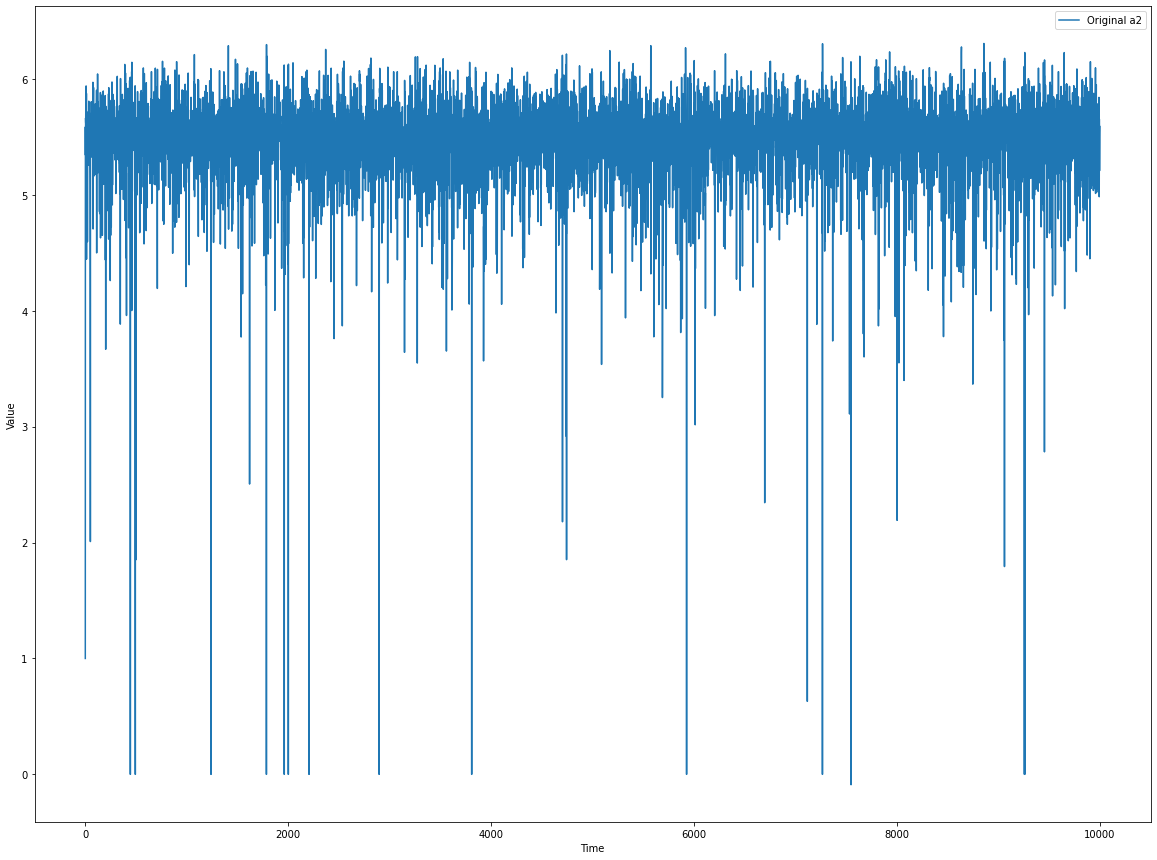

In [342]:
#plt.figure(figsize=(30, 15))
plt.plot(a2, label='Original a2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('a2.pdf', format='pdf')
plt.show()

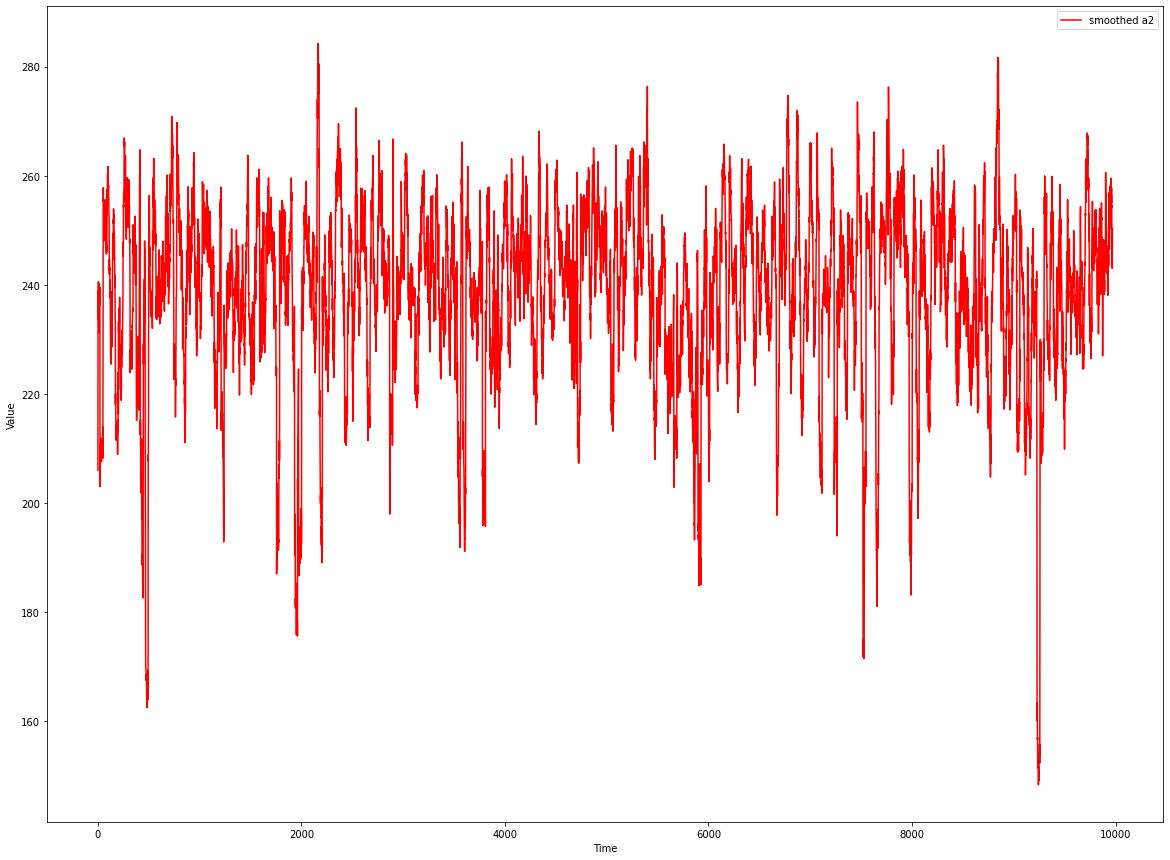

In [343]:
#plt.figure(figsize=(30, 15))
plt.plot(smoothed_a2, label='smoothed a2',color = 'red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('smoothed_a2.pdf', format='pdf')
plt.show()

### Υπολογισμός της διαφοράς των χρονοσειρών για σ = 120

In [344]:
diff2 = [a2[i] - a2[i-1] for i in range(1,len(a2))]


### Δημιουργία νέων χρονοσειρέων με το Moving Average για τις διαφορές των σ = 30 και  σ = 120

In [345]:
smoothed_diff1 = np.convolve(diff1, np.ones(window_size) / window_size, mode='valid')
smoothed_diff2 = np.convolve(diff2, np.ones(window_size) / window_size, mode='valid')

### Σχεδιάγραμμα των αποτελεσμάτων της εξίσωσης για σ = 30 και σ = 120 μαζί με το αντίστοιχo Average τους

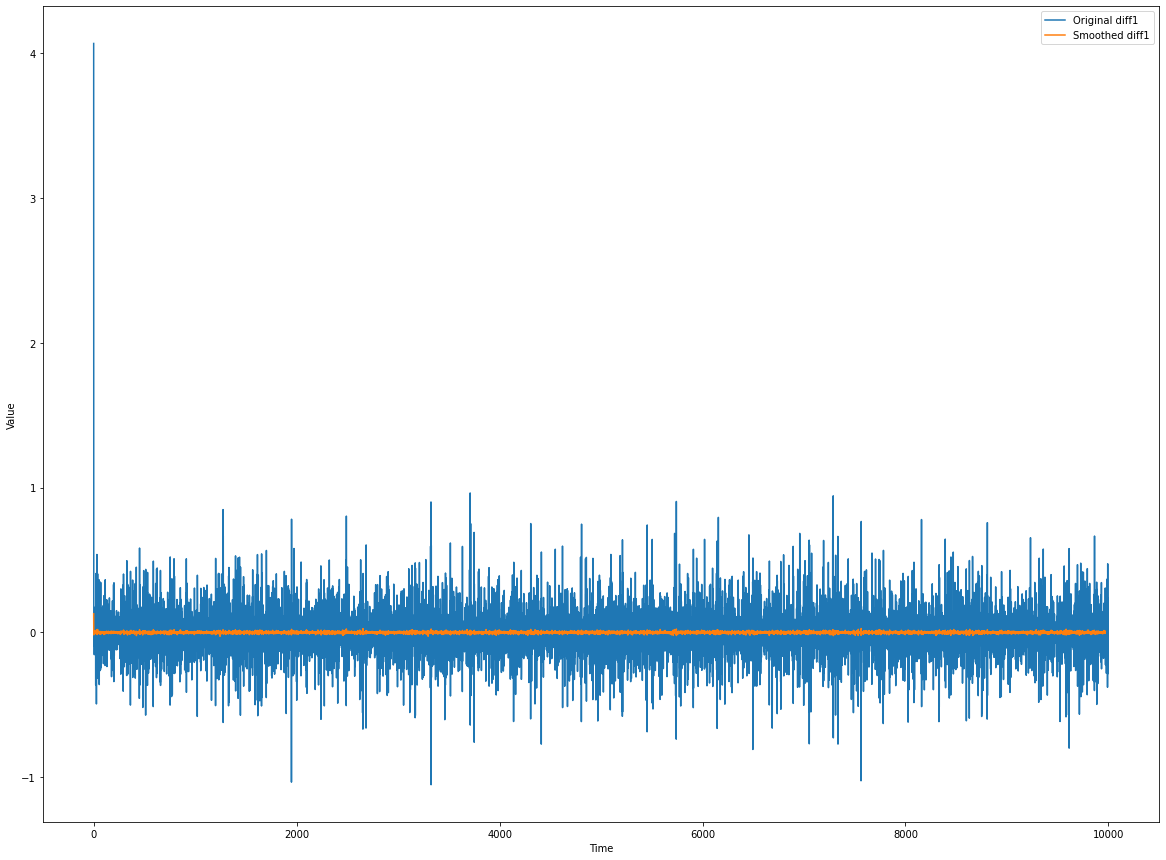

In [346]:
#plt.figure(figsize=(20, 12))
plt.plot(diff1, label='Original diff1')
plt.plot(smoothed_diff1, label='Smoothed diff1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('diff1.pdf', format='pdf')
plt.show()

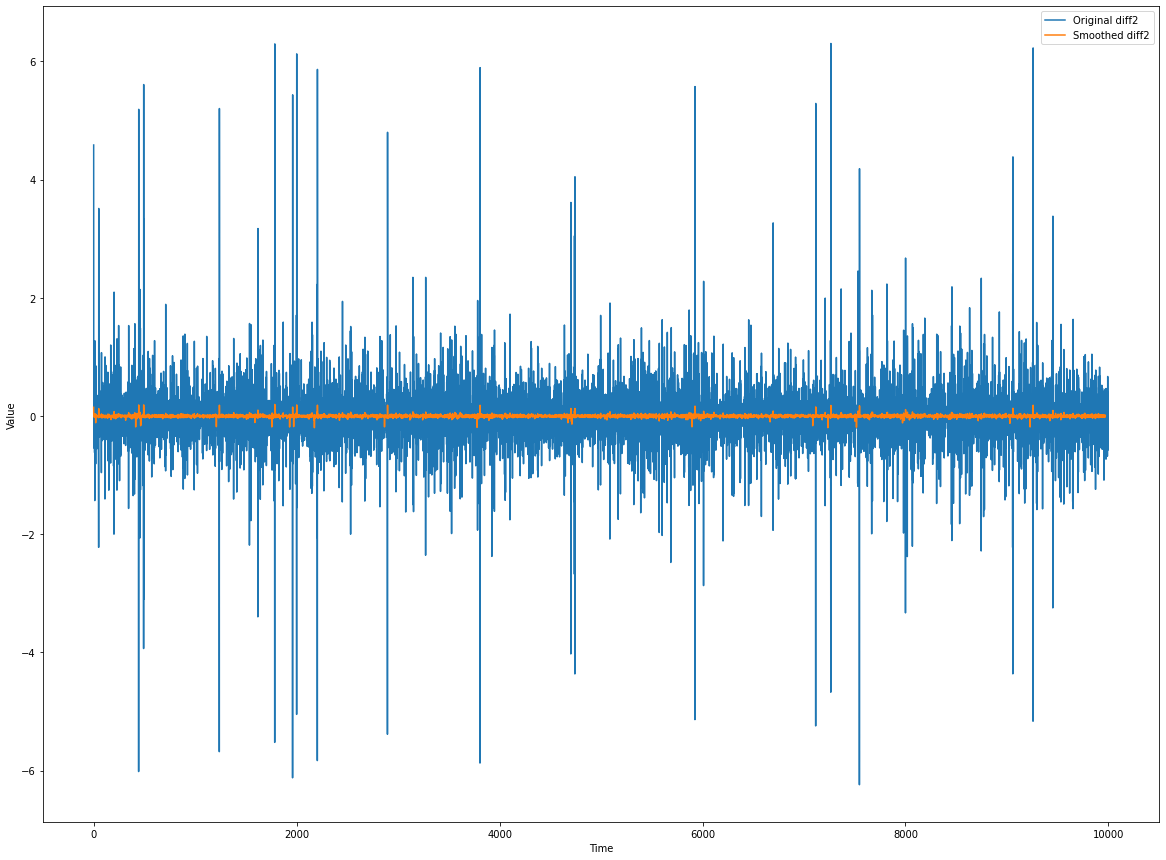

In [347]:
#plt.figure(figsize=(20, 12))
plt.plot(diff2, label='Original diff2')
plt.plot(smoothed_diff2, label='Smoothed diff2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('diff2.pdf', format='pdf')
plt.show()

### Σχεδιάγραμμα των autocorrelation των εξισώσεων για σ = 30 και σ = 120 μαζί με το αντίστοιχo Average τους

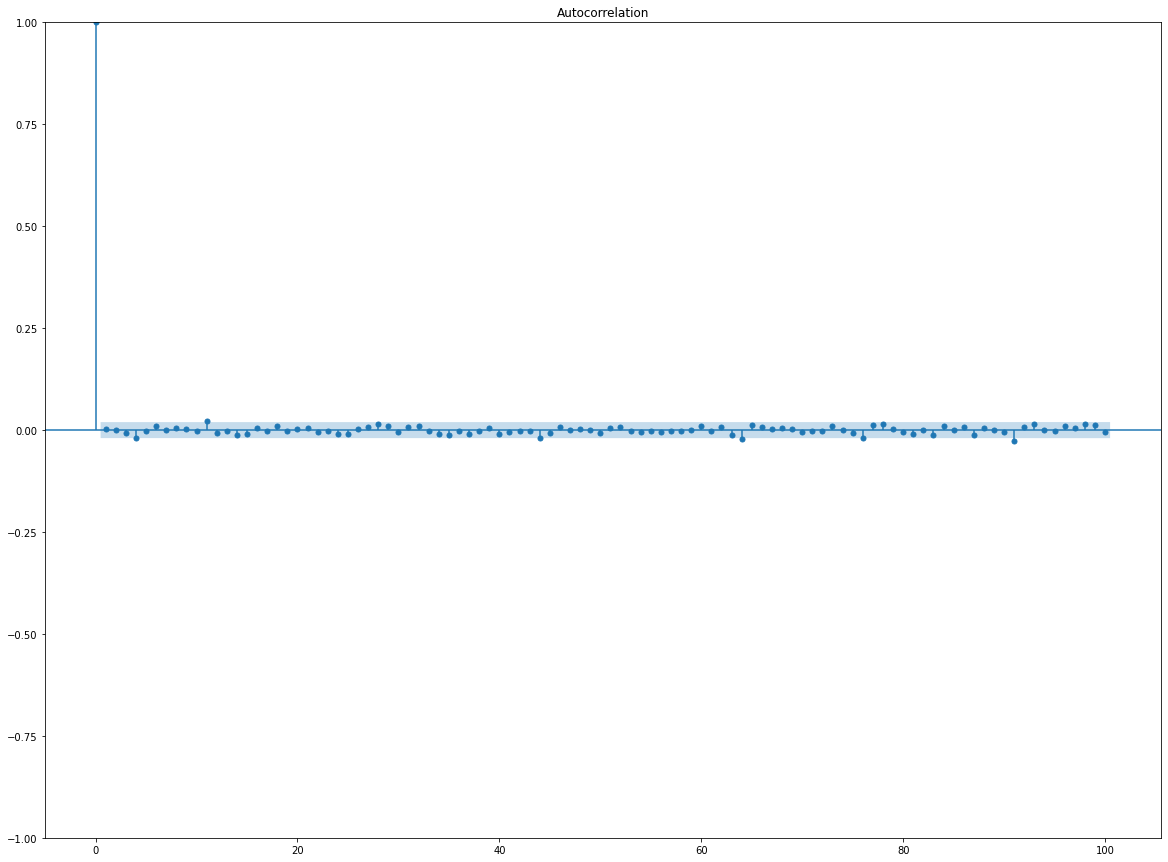

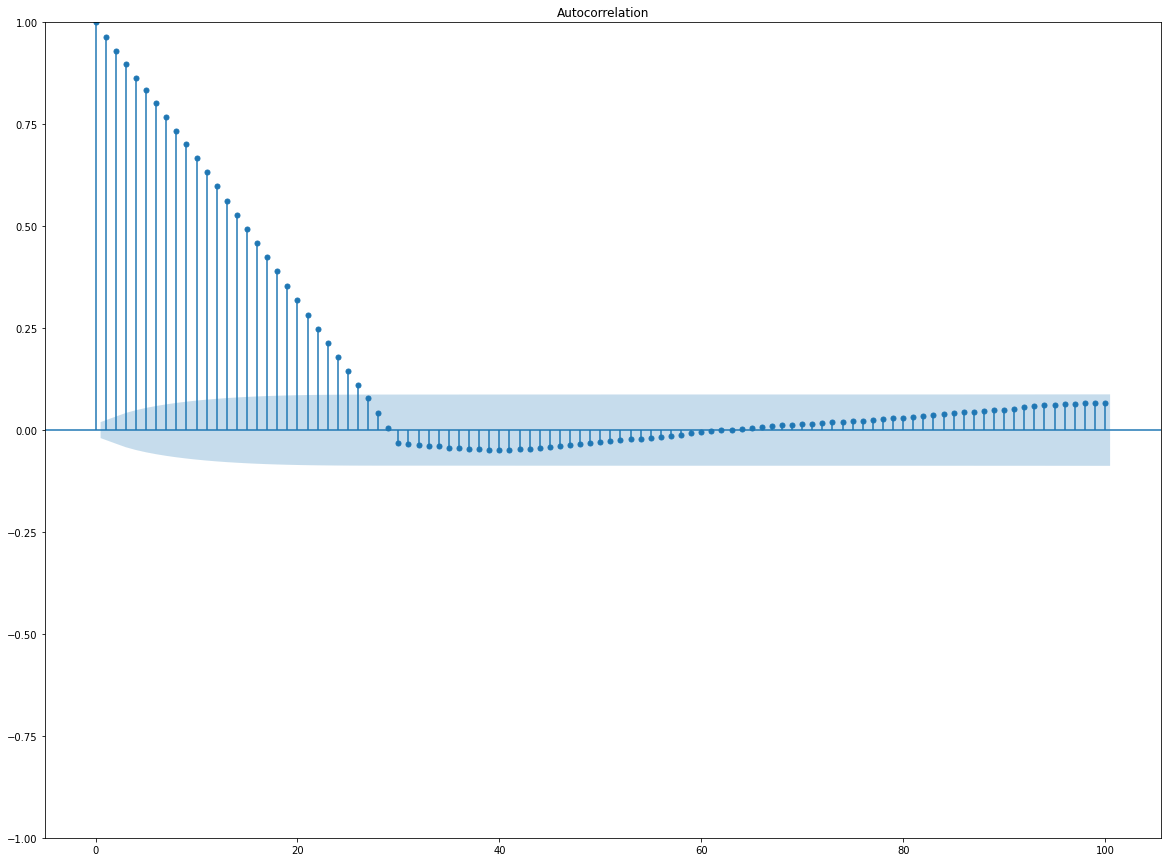

In [348]:
plot_acf(a1,lags=100)
plt.savefig('autoc1.pdf', format='pdf')
plt.show()

plot_acf(smoothed_a1,lags=100)
plt.savefig('auto1.pdf', format='pdf')
plt.show()


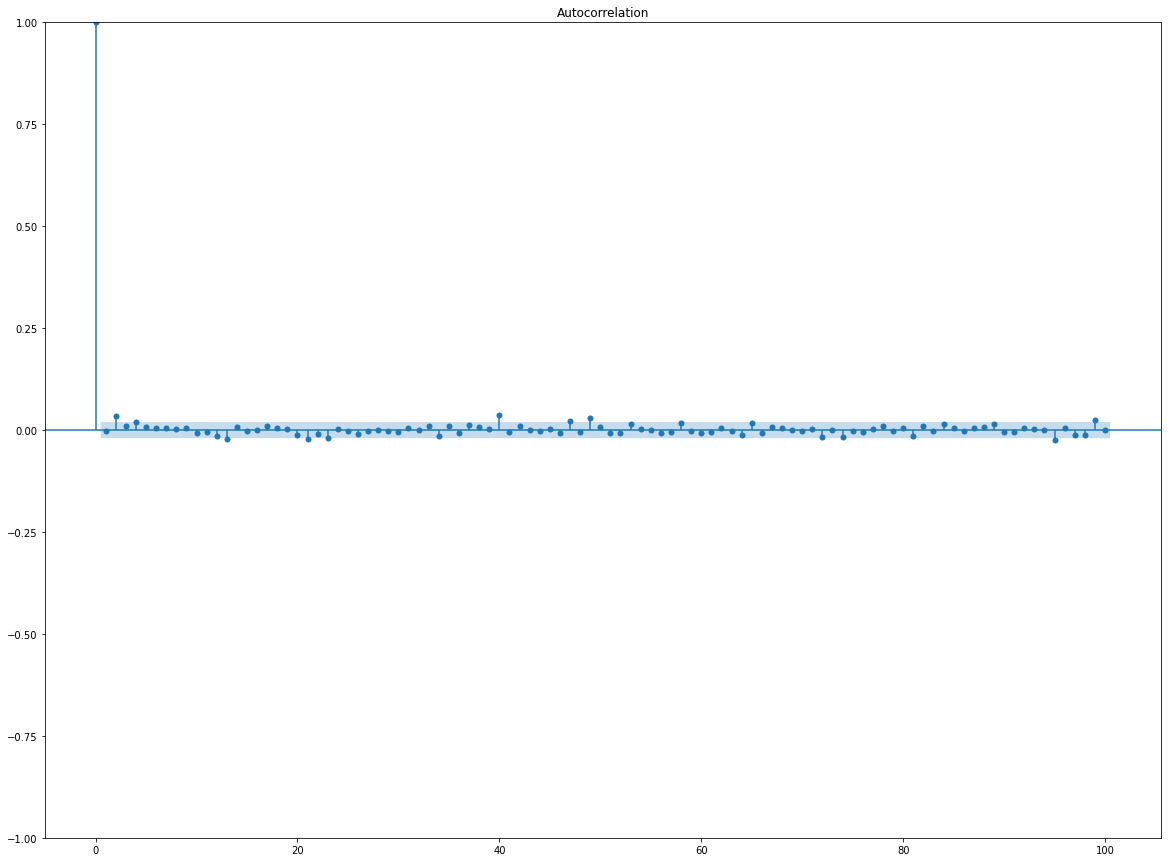

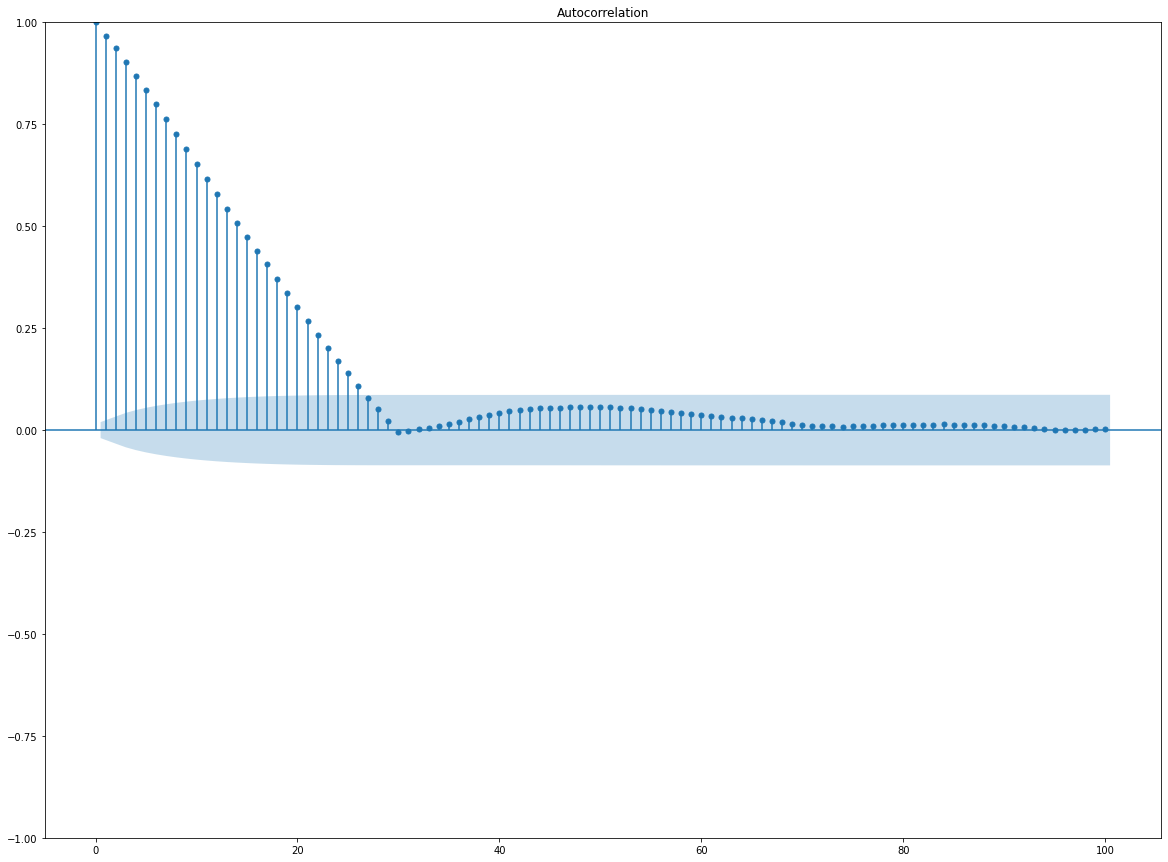

In [349]:
plot_acf(a2,lags=100)
plt.savefig('autoc2.pdf', format='pdf')
plt.show()

plot_acf(smoothed_a2,lags=100)
plt.savefig('auto2.pdf', format='pdf')
plt.show()
